Keras -> Building NN
TenserFlow and Theano -> Computation

- A sequential model
- Added The Layers
    - Loss, Optimiser, Metrics
- Fit
- Predict
- Evaluate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 3 Layers
#unit - no. of nuerons
#input_dim - dimension of the data, we have 8 in our case
model.add(Dense(15, activation="relu", input_dim = 8))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid")) #output layer
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                135       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


In [6]:
#binary entropy hinge, squared hinge loss
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = "accuracy")

In [7]:
#epochs 50
#batch 10
history = model.fit(x,y, epochs = 50, batch_size = 10)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 2.3418 - accuracy: 0.5921
Epoch 2/50
77/77 [==============================] - 0s 1ms/step - loss: 1.6501 - accuracy: 0.5805
Epoch 3/50
77/77 [==============================] - 0s 1ms/step - loss: 0.9921 - accuracy: 0.6181
Epoch 4/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7516 - accuracy: 0.6441
Epoch 5/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.6247
Epoch 6/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.6554
Epoch 7/50
77/77 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.6566
Epoch 8/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6496 - accuracy: 0.6387
Epoch 9/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6225 - accuracy: 0.6560
Epoch 10/50
77/77 [==============================] - 0s 1ms/step - loss: 0.6538 - accuracy: 0.6486
Epoch 11/50
77/77 [

In [15]:
# Evaluation
loss, acc = model.evaluate(x,y)

24/24 [==============================] - 0s 1ms/step - loss: 0.5307 - accuracy: 0.7383


In [16]:
acc

0.73828125

In [17]:
loss

0.530745267868042

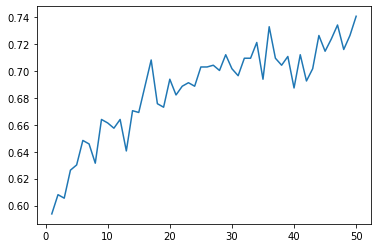

In [11]:
plt.plot(range(1,51),history.history["accuracy"])

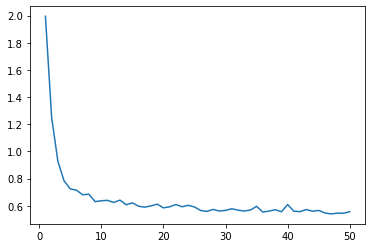

In [12]:
plt.plot(range(1,51),history.history["loss"])

In [13]:
ypred = model.predict_classes(x)

C:\Users\tejas\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
ypred.flatten()

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,